In [1]:
project_name = "cp_spaceflight-from-1957-to-2020"

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "gspacecofficial/cp-spaceflight-from-1957-to-2020" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/gspacecofficial/cp-spaceflight-from-1957-to-2020


'https://jovian.ml/gspacecofficial/cp-spaceflight-from-1957-to-2020'

# Spaceflight from 1957 to 2020

In this notebook I will perform a data analysis on a dataset covering all space missions from October 1957 to August 2020. The dataset has been downloaded from kaggle: https://www.kaggle.com/agirlcoding/all-space-missions-from-1957

After downloading I modified the dataset by changing the column names to more suitable ones. Apart from this the dataset has not been changed.

It has 9 columns and over 4300 rows. I will clean the dataset, perform exploratory analysis, ask and answer questions about the dataset and last but not least, make you learn something new about spaceflight using data visualization.

### Contents
- Data Preparation and Cleaning
- Exploratory Analysis
- Asking and Answering Questions
- Data Visualization
- Conclusion
- References and possible Analysis in the Future

## Data Preparation and Cleaning

First I will install and import pandas which is used to work with dataframes.

In [5]:
!pip install pandas --quiet

In [6]:
import pandas as pd

Now I will download the raw data file and store the raw dataset in a pandas data frame

In [7]:
import urllib.request

In [8]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/MorrisMessingXYZ/Space-Flight-From-1957-To-2020/main/Space_Corrected.csv', './Space_Corrected.csv');

In [9]:
space_missions_df_raw = pd.read_csv("Space_Corrected.csv")

Let's take a look on the data frame and get some information.

In [10]:
space_missions_df_raw

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status_Rocket,Rocket_Cost,Status_Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [11]:
space_missions_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status_Rocket   4324 non-null   object
 7   Rocket_Cost     964 non-null    object
 8   Status_Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [12]:
space_missions_df_raw.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Company Name', 'Location', 'Datum',
       'Detail', 'Status_Rocket', 'Rocket_Cost', 'Status_Mission'],
      dtype='object')

The first two columns seem to have the same values as the row numbers, so let's create a new data frame without them.

In [13]:
space_missions_df = space_missions_df_raw.drop("Unnamed: 0", axis=1)

In [14]:
space_missions_df = space_missions_df.drop("Unnamed: 0.1", axis=1)

In [15]:
space_missions_df

,Company Name,Location,Datum,Detail,Status_Rocket,Rocket_Cost,Status_Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In the column Location, you can see that the last part of the sting always is the country the rocket launched from. I would like to have that in an own column, so let's get this done.

First we add a new column to the data frame and fill it with a default value.

In [16]:
space_missions_df["Country"] = "NaN"

In [17]:
space_missions_df

,Company Name,Location,Datum,Detail,Status_Rocket,Rocket_Cost,Status_Mission,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,NaN
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,NaN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,NaN
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,NaN
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,NaN
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,NaN
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,NaN
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,NaN
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,NaN


Now I will write a loop that gets the country of the launch from the location cell and adds it to the country cell.

In [18]:
for x in range(len(space_missions_df)):
    location = space_missions_df["Location"][x]
    country_arr = location.split(",")
    country = country_arr[-1]
    country.strip()
    space_missions_df["Country"][x] = country

In [19]:
space_missions_df

,Company Name,Location,Datum,Detail,Status_Rocket,Rocket_Cost,Status_Mission,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan


Great! That seems to have worked.

Let's also do this with the Rocket names covered in the Detail column.

In [20]:
space_missions_df["Rocket_Name"] = "NaN"

In [21]:
for x in range(len(space_missions_df)):
    detail = space_missions_df["Detail"][x]
    name_arr = detail.split("|")
    name = name_arr[0]
    name.strip()
    space_missions_df["Rocket_Name"][x] = name 

In [22]:
space_missions_df

,Company Name,Location,Datum,Detail,Status_Rocket,Rocket_Cost,Status_Mission,Country,Rocket_Name
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,Falcon 9 Block 5
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,Long March 2D
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,Starship Prototype
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,Proton-M/Briz-M
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,Atlas V 541
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,Vanguard
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,Juno I
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,Vanguard
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,Sputnik 8K71PS


That looks good for now. Let's find out some things about the dataframe.

In [23]:
import jovian

In [24]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "gspacecofficial/cp-spaceflight-from-1957-to-2020" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/gspacecofficial/cp-spaceflight-from-1957-to-2020


'https://jovian.ml/gspacecofficial/cp-spaceflight-from-1957-to-2020'

## Exploratory Analysis

First, let's find out how many missions there were in total.

In [25]:
missions = len(space_missions_df)

In [26]:
print("There were " + str(missions) +" missions in total.")

There were 4324 missions in total.


That was pretty easy! Now let's try something a little more difficult.

What about how many of them were launched on now retired rockets?

In [27]:
space_missions_df.Status_Rocket.value_counts()

StatusRetired    3534
StatusActive      790
Name: Status_Rocket, dtype: int64

In [28]:
num_retired = space_missions_df.Status_Rocket.value_counts().StatusRetired

In [29]:
print(str(num_retired) + " out of " + str(missions) + " Missions were launched on rockets which are retired today.")

3534 out of 4324 Missions were launched on rockets which are retired today.


Let's plot this.

In [30]:
!pip install matplotlib --quiet
!pip install seaborn --quiet

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

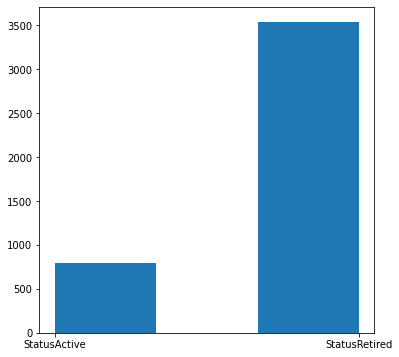

In [32]:
plt.figure(figsize = (6, 6))
plt.hist(space_missions_df.Status_Rocket, bins=3);

Let's find out which percentage of launches have been successful in total.

In [33]:
space_missions_df.Status_Mission.value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Status_Mission, dtype: int64

In [34]:
num_success = space_missions_df.Status_Mission.value_counts().Success

In [35]:
print(str(num_success) + " out of " + str(missions) + " Missions have been successful to date.")

3879 out of 4324 Missions have been successful to date.


In [36]:
perc_success = num_success / missions * 100

In [37]:
print("This equals " + str(perc_success) + "%.")

This equals 89.70860314523588%.


What about the other cases?

In [38]:
perc_failure = space_missions_df.Status_Mission.value_counts().Failure / missions * 100

In [39]:
perc_part_failure = space_missions_df.Status_Mission.value_counts()["Partial Failure"]/ missions * 100

In [40]:
perc_pre_failure = space_missions_df.Status_Mission.value_counts()["Prelaunch Failure"]/ missions * 100

Let's make a pie chart out of this.

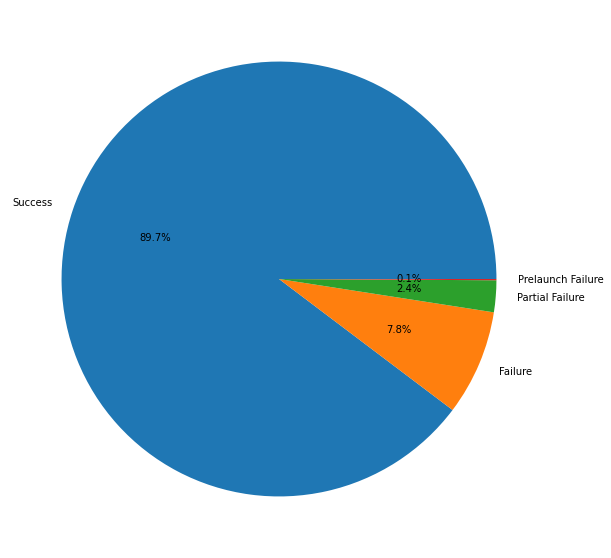

In [41]:
plt.figure(figsize = (10, 10))
labels = "Success", "Failure", "Partial Failure", "Prelaunch Failure"
sizes = [perc_success, perc_failure, perc_part_failure, perc_pre_failure]
plt.pie(sizes, labels=labels, autopct='%1.1f%%');

In [42]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "gspacecofficial/cp-spaceflight-from-1957-to-2020" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/gspacecofficial/cp-spaceflight-from-1957-to-2020


'https://jovian.ml/gspacecofficial/cp-spaceflight-from-1957-to-2020'

We found out some pretty intersting things. That's nice! But now let's dig a little deeper.

## Asking and Answering Questions

### Questions
- How many mission have been attempted in each year?
- Which 20 Rockets have been used for the most missions?
- Which 5 companies have launched the most rockets?
- How many missions have been launched from each listed country?
- How high is the success rate of each company?

### Question 1: How many missions have been attempted in each year?

First we have to get the year of launch for every mission. There is a Datum column but since I was not successful converting it into the datetime format, we have to extract the date from the string of each cell in the Datum column.

Do to so we will use the same algorithm that we have used to extract the rocket names and the countries, only with a few changes.

In [43]:
space_missions_df["Year"] = "NaN"

In [44]:
for x in range(len(space_missions_df)):
    date = space_missions_df["Datum"][x]
    year_arr = date.split(",")
    year = year_arr[-1]
    year.strip()
    year_arr = year.split(" ")
    year = year_arr[1] 
    space_missions_df["Year"][x] = year

In [45]:
space_missions_df

,Company Name,Location,Datum,Detail,Status_Rocket,Rocket_Cost,Status_Mission,Country,Rocket_Name,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,Falcon 9 Block 5,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,Long March 2D,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,Starship Prototype,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,Proton-M/Briz-M,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,Atlas V 541,2020
...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,Vanguard,1958
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,Juno I,1958
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,Vanguard,1957
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,Sputnik 8K71PS,1957


In [46]:
space_missions_df.Year.value_counts()

1971    119
2018    117
1977    114
1975    113
1976    113
       ... 
2010     37
2005     37
1958     28
1959     20
1957      3
Name: Year, Length: 64, dtype: int64

In [47]:
space_missions_df_year = space_missions_df.groupby("Year")[["Detail"]].count()

In [48]:
space_missions_df_year

,Detail
Year,
1957,3
1958,28
1959,20
1960,39
1961,52
...,...
2016,90
2017,92
2018,117


As we are only counting the values for each year, it does not matter which column we choose for the new data frame.
I choosed Detail because it is the least confusing.

Let's see how a line plot would look like.

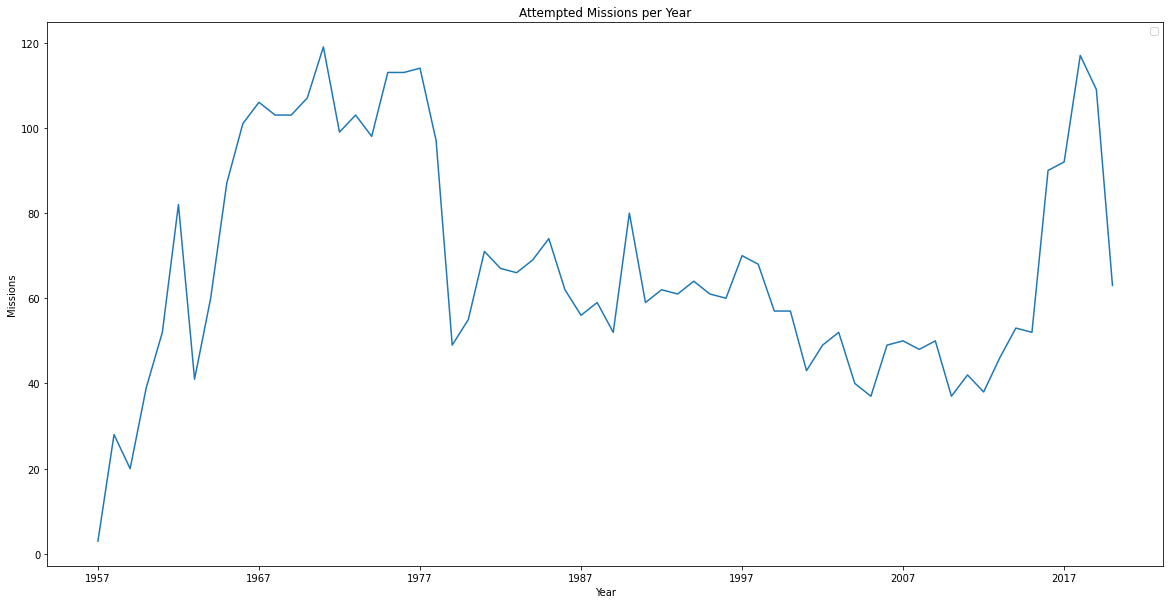

In [49]:
space_missions_df_year.plot(figsize=(20,10));
plt.xlabel("Year");
plt.ylabel("Missions");
plt.legend("");
plt.title("Attempted Missions per Year");

It's nice to get an overview how the amount of attempted missions changed over the years, but you can't really see how many missions were attempted in each single year.

So what about a bar chart. This should be much more readable.

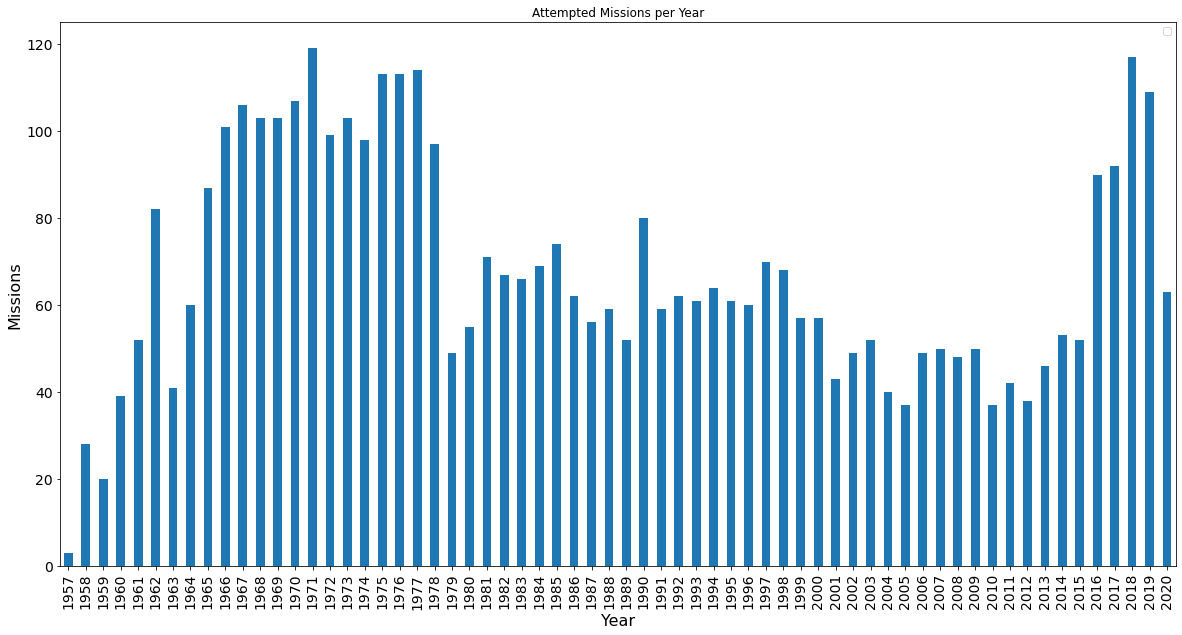

In [50]:
space_missions_df_year.plot.bar(figsize=(20,10), fontsize=14);
plt.xlabel("Year",fontsize=16);
plt.ylabel("Missions",fontsize=16);
plt.legend("");
plt.title("Attempted Missions per Year");

This looks much better!
### Question 1 answered.
---

In [51]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "gspacecofficial/cp-spaceflight-from-1957-to-2020" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/gspacecofficial/cp-spaceflight-from-1957-to-2020


'https://jovian.ml/gspacecofficial/cp-spaceflight-from-1957-to-2020'

### Qustion 2: Which 20 Rockets have been used for the most missions??

To answer this question we will use a similar approach as for answering Question 1, but this time we will group by Rocket Names.

In [52]:
space_missions_df.Rocket_Name.value_counts()

Cosmos-3M (11K65M)      446
Voskhod                 299
Molniya-M /Block ML     128
Cosmos-2I (63SM)        126
Soyuz U                 125
                       ... 
Scout B1                  1
Proton K/Block-DM         1
Taepodong-1               1
Atlas-E/F Altair          1
Soyuz 2.1v                1
Name: Rocket_Name, Length: 352, dtype: int64

In [53]:
space_missions_df_rocket = space_missions_df.groupby("Rocket_Name")[["Detail"]].count().sort_values("Detail", ascending=False).head(20)

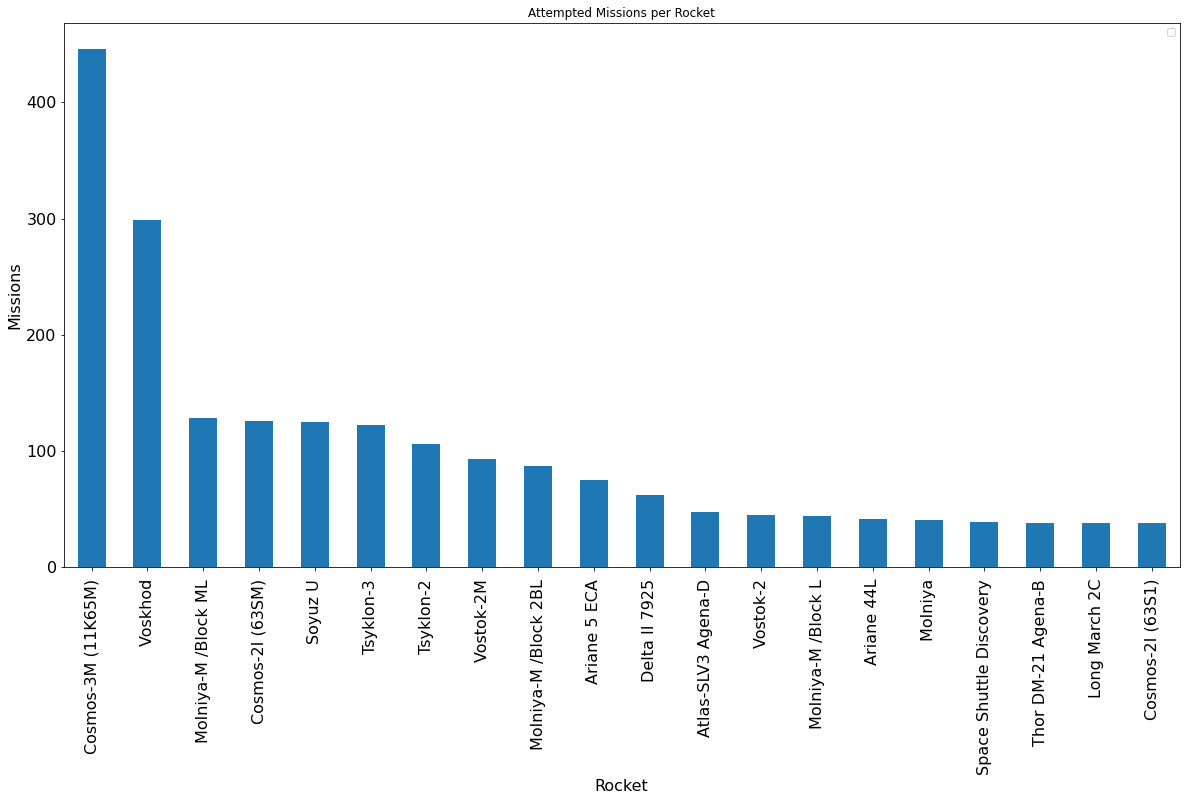

In [54]:
space_missions_df_rocket.plot.bar(figsize=(20,10),fontsize=16);
plt.xlabel("Rocket",fontsize=16);
plt.ylabel("Missions",fontsize=16);
plt.legend("");
plt.title("Attempted Missions per Rocket");


### Question 2 answered.

It seems that the most used rocket to date is the Cosmos-3M. It has been used for 446 missions, which is more than 10% of all missions ever launched. This is crazy!

---

In [55]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "gspacecofficial/cp-spaceflight-from-1957-to-2020" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/gspacecofficial/cp-spaceflight-from-1957-to-2020


'https://jovian.ml/gspacecofficial/cp-spaceflight-from-1957-to-2020'

### Question 3: Which 5 companies have launched the most rockets?

Basically we will use the same approach as we have done for Question 1 and Qustion 2.

In [56]:
space_missions_df["Company Name"].value_counts()

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
ESA                   13
Eurockot              13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
JAXA                   7
Land Launch            7
MITT                   7
UT                     5
CASIC                  5
KCST                   5
CECLES                 4
Exos                   4
Arm??e de l'Air        4


In [57]:
space_missions_df_companies = space_missions_df.groupby("Company Name")[["Detail"]].count().sort_values("Detail", ascending=False).head(5)

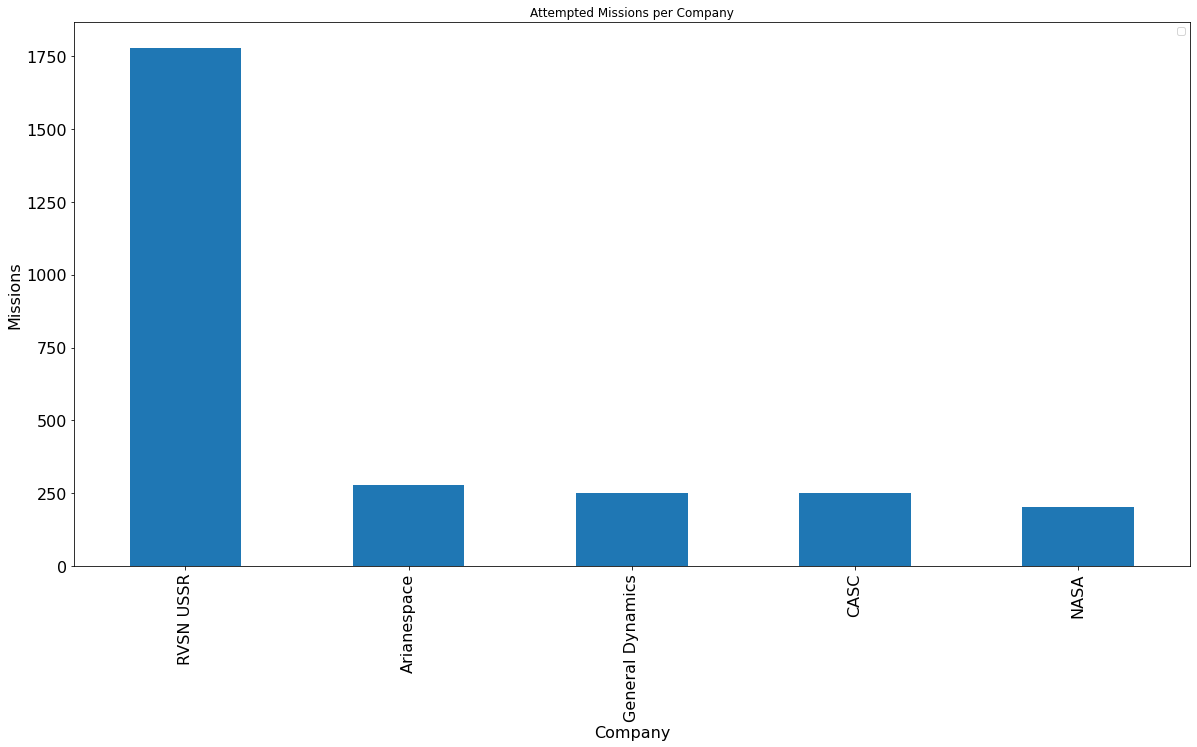

In [58]:
space_missions_df_companies.plot.bar(figsize=(20,10),fontsize=16);
plt.xlabel("Company",fontsize=16);
plt.ylabel("Missions",fontsize=16);
plt.legend("");
plt.title("Attempted Missions per Company");

### Question 3 answered.

It's pretty interesting that NASA, which for most people is the most famous space agency, only has launched a very small amout of missions compared to the Strategic Missile Forces of the Soviet Union and now the Russian Federation (RVSN USSR).

### Question 4: How many missions have been launched from each listed country?

In [59]:
space_missions_df["Country"].value_counts()

 Russia                            1395
 USA                               1344
 Kazakhstan                         701
 France                             303
 China                              268
 Japan                              126
 India                               76
 Pacific Ocean                       36
 Iran                                13
 New Zealand                         13
 Israel                              11
 Kenya                                9
 Australia                            6
 North Korea                          5
 New Mexico                           4
 Brazil                               3
 Barents Sea                          3
 South Korea                          3
 Gran Canaria                         2
 Pacific Missile Range Facility       1
 Shahrud Missile Test Site            1
 Yellow Sea                           1
Name: Country, dtype: int64

It seams that some missions have been launched from locations not considered as countries.

Specifically:
- Pacific Ocean
- New Mexico (which in in the USA)
- Barents Sea
- Shahrud Missile Test Site (which is in Iran)
- Yellow Sea
- Pacific Missile Range Facility (which is in the USA)


So let's create a new data frame and correct this.

In [60]:
space_missions_df_country = space_missions_df.groupby("Country")[["Detail"]].count().sort_values("Detail", ascending=False)

Because I dont want to change the original data frame I will create a copy.

In [61]:
space_missions_df_country_corrected = space_missions_df_country.copy()

In [62]:
space_missions_df_country_corrected

,Detail
Country,
Russia,1395
USA,1344
Kazakhstan,701
France,303
China,268
Japan,126
India,76
Pacific Ocean,36
New Zealand,13


Now, let's delete all the rows which are not considered countries.

In [63]:
space_missions_df_country_corrected = space_missions_df_country_corrected.drop(space_missions_df_country_corrected.index[[7,14,15,19,20,21]])

We have removed the rows without real countries, but now we have to add the missions, which launched from locations inside of countries to the right ones.

Let's start with the USA.

In [64]:
space_missions_df_country_corrected.at[" USA", "Detail"] = space_missions_df_country_corrected.at[" USA","Detail"] + space_missions_df.Country.value_counts()[" New Mexico"] + space_missions_df.Country.value_counts()[" Pacific Missile Range Facility"]

In [65]:
space_missions_df_country_corrected

,Detail
Country,
Russia,1395
USA,1349
Kazakhstan,701
France,303
China,268
Japan,126
India,76
New Zealand,13
Iran,13


That seems to have worked. Now we will repeat with Iran.

In [66]:
space_missions_df_country_corrected.at[" Iran", "Detail"] = space_missions_df_country_corrected.at[" Iran","Detail"] + space_missions_df.Country.value_counts()[" Shahrud Missile Test Site"]

Let's view the corrected data set.

In [67]:
space_missions_df_country_corrected

,Detail
Country,
Russia,1395
USA,1349
Kazakhstan,701
France,303
China,268
Japan,126
India,76
New Zealand,13
Iran,14


Looks clean! Now we can create a nice bar plot.

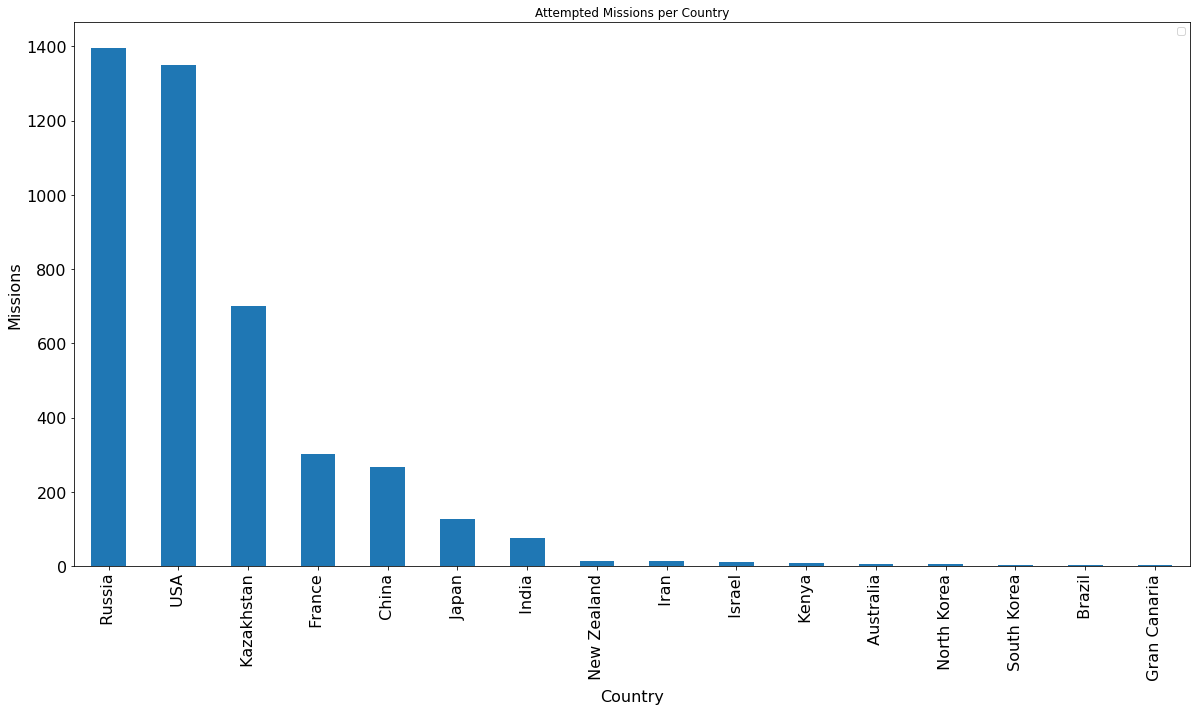

In [68]:
space_missions_df_country_corrected.plot.bar(figsize=(20,10),fontsize=16);
plt.xlabel("Country",fontsize=16);
plt.ylabel("Missions",fontsize=16);
plt.legend("");
plt.title("Attempted Missions per Country");

### Question 4 answered.

It seems that the US Companies have nearly as much launches under the belt as Russian Companies, but considerered that Russia also launches missions from Kazakhstan, Russian Companies have a lot more missions flown than US Companies.

In [69]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "gspacecofficial/cp-spaceflight-from-1957-to-2020" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/gspacecofficial/cp-spaceflight-from-1957-to-2020


'https://jovian.ml/gspacecofficial/cp-spaceflight-from-1957-to-2020'

### Question 5: Which company has the highest success rate?

Solving this will be a little more complex, so let's get started!

First we will remove all the columns that we do not need.

In [70]:
space_missions_df_success = space_missions_df.drop(["Location","Datum", "Detail", "Status_Rocket", "Rocket_Cost", "Country", "Rocket_Name", "Year"], axis=1)

Since we only want the missions which were successful, we need to create a filter and apply it to the data frame.

In [71]:
space_missions_df_success_filter = space_missions_df.Status_Mission == "Success"

In [72]:
space_missions_df_success = space_missions_df_success[space_missions_df_success_filter]

In [73]:
space_missions_df_success

,Company Name,Status_Mission
0,SpaceX,Success
1,CASC,Success
2,SpaceX,Success
3,Roscosmos,Success
4,ULA,Success
...,...,...
4316,AMBA,Success
4317,US Navy,Success
4320,AMBA,Success
4322,RVSN USSR,Success


It looks like every mission that was not successful has been removed. Great!

Now we will count the values grouped by the company names.

In [74]:
space_missions_df_success = space_missions_df_success.groupby("Company Name").count().sort_values("Status_Mission", ascending=False)

In [75]:
space_missions_df_success

,Status_Mission
Company Name,
RVSN USSR,1614
Arianespace,269
CASC,231
General Dynamics,203
VKS RF,188
NASA,186
ULA,139
Boeing,131
US Air Force,129


To calculate the rate of success, we have to devide the successful missions by the total missions for each company and multiply it by 100 to get the percentage, so we need to get the total missions.

In [76]:
space_missions_df_success["Launches"] = space_missions_df.groupby("Company Name")[["Detail"]].count().sort_values("Detail", ascending=False)

In [77]:
space_missions_df_success

,Status_Mission,Launches
Company Name,,
RVSN USSR,1614,1777
Arianespace,269,279
CASC,231,251
General Dynamics,203,251
VKS RF,188,201
NASA,186,203
ULA,139,140
Boeing,131,136
US Air Force,129,161


Now we can calculate the rate of success.

In [78]:
space_missions_df_success["Success_Rate"]= space_missions_df_success.Status_Mission/space_missions_df_success.Launches * 100

In [79]:
space_missions_df_success

,Status_Mission,Launches,Success_Rate
Company Name,,,
RVSN USSR,1614,1777,90.827237
Arianespace,269,279,96.415771
CASC,231,251,92.031873
General Dynamics,203,251,80.876494
VKS RF,188,201,93.532338
NASA,186,203,91.625616
ULA,139,140,99.285714
Boeing,131,136,96.323529
US Air Force,129,161,80.124224


That seems to have worked! Let's sort the values to make the data frame look a little cleaner.

In [80]:
space_missions_df_success = space_missions_df_success.sort_values("Success_Rate", ascending=False)

In [81]:
space_missions_df_success

,Status_Mission,Launches,Success_Rate
Company Name,,,
i-Space,1,1,100.000000
IRGC,1,1,100.000000
Blue Origin,12,12,100.000000
Yuzhmash,2,2,100.000000
OKB-586,2,2,100.000000
Khrunichev,1,1,100.000000
Starsem,1,1,100.000000
ASI,9,9,100.000000
Douglas,1,1,100.000000


Now we can plot the data.

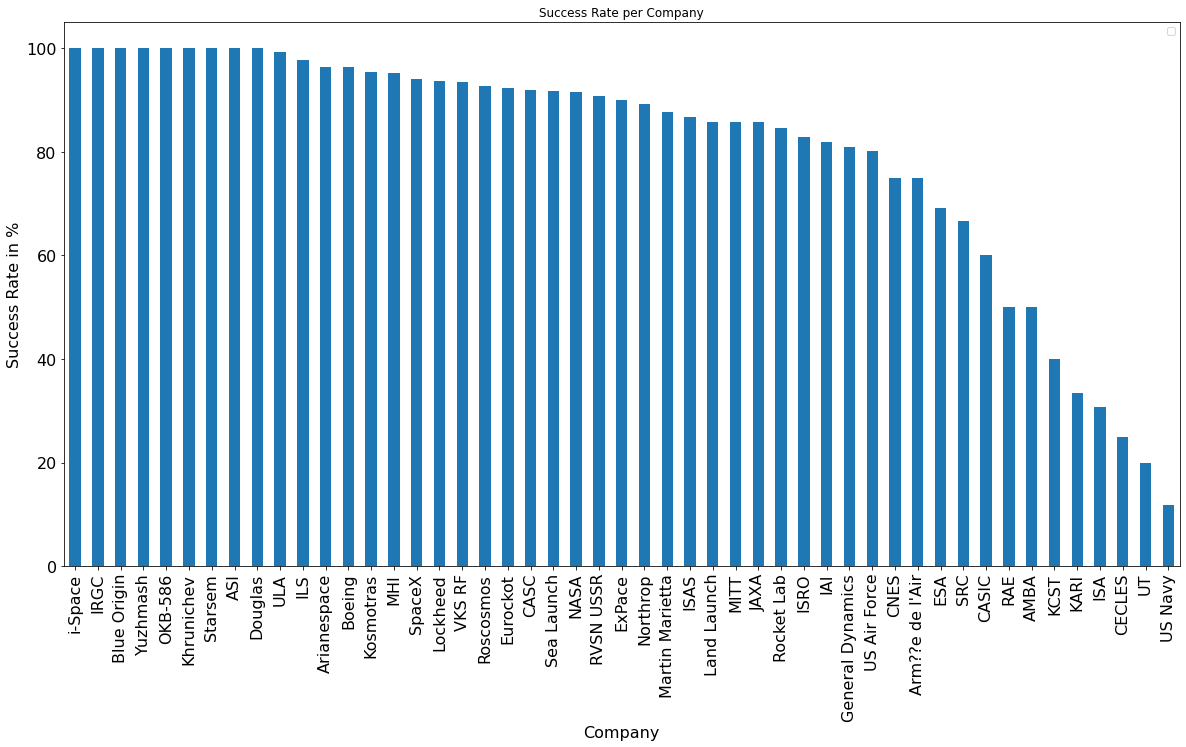

In [82]:
space_missions_df_success.Success_Rate.plot.bar(figsize=(20,10),fontsize=16);
plt.xlabel("Company",fontsize=16);
plt.ylabel("Success Rate in %",fontsize=16);
plt.legend("");
plt.title("Success Rate per Company");

### Question 5 answered.

I find it interesting that no company has a success rate of 0%. Since space missions are really expensive, a company could easily go bankrupt if the first missions fail. In fact this nearly was the case for SpaceX. To date SpaceX has a success rate of 94% which is better than NASA.

In [83]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "gspacecofficial/cp-spaceflight-from-1957-to-2020" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/gspacecofficial/cp-spaceflight-from-1957-to-2020


'https://jovian.ml/gspacecofficial/cp-spaceflight-from-1957-to-2020'

## Data Visualization

Here, all of the final plots above will be inserted to give you a final overview of the data weve analyzed.

### Distribution of missions launched on (currently) active or retired rockets

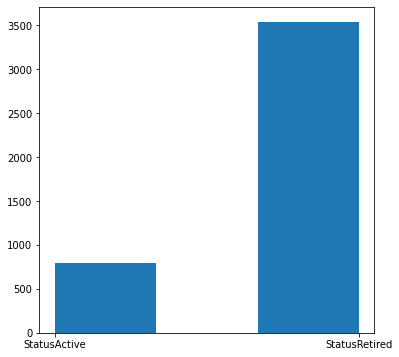

In [84]:
plt.figure(figsize = (6, 6))
plt.hist(space_missions_df.Status_Rocket, bins=3);

### Proportions of Success, Failure, Partial Failure and Prelaunch Failure over all listed missions

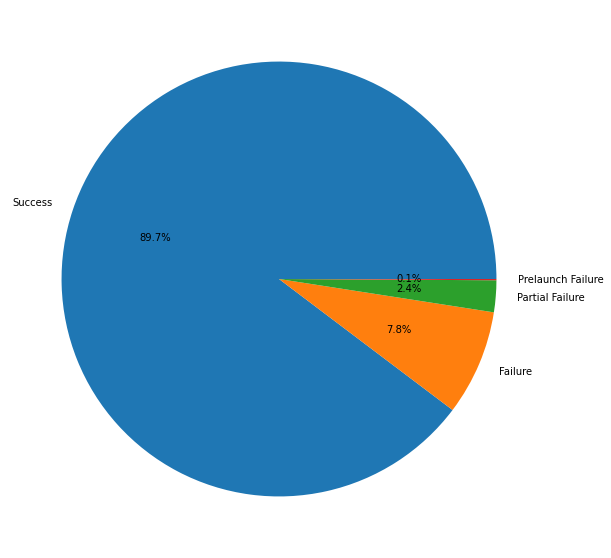

In [85]:
plt.figure(figsize = (10, 10))
labels = "Success", "Failure", "Partial Failure", "Prelaunch Failure"
sizes = [perc_success, perc_failure, perc_part_failure, perc_pre_failure]
plt.pie(sizes, labels=labels, autopct='%1.1f%%');

### Attempted Missions for each Year

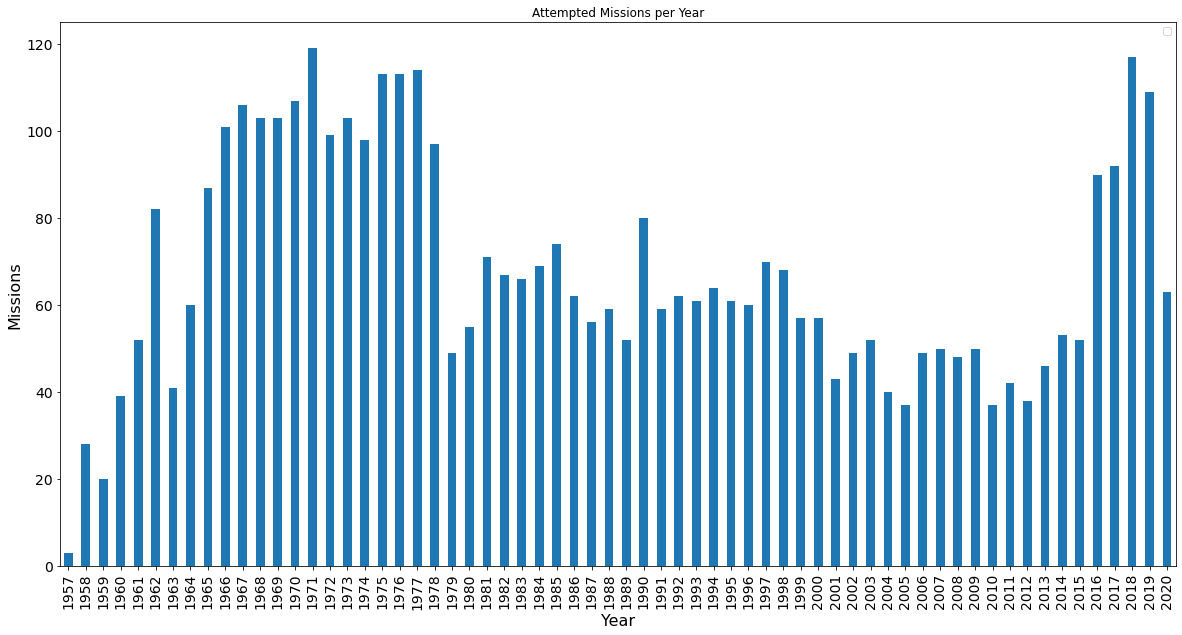

In [86]:
space_missions_df_year.plot.bar(figsize=(20,10), fontsize=14);
plt.xlabel("Year",fontsize=16);
plt.ylabel("Missions",fontsize=16);
plt.legend("");
plt.title("Attempted Missions per Year");

### Top 20 most launched rockets

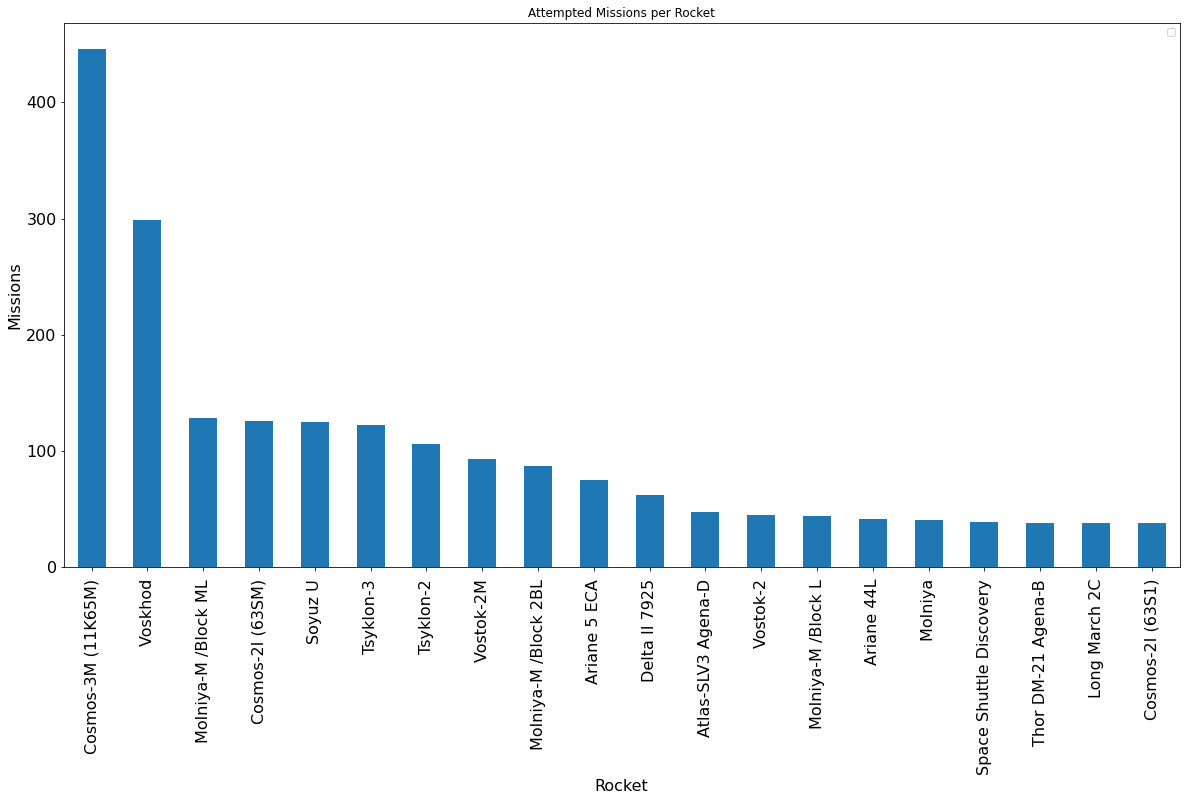

In [87]:
space_missions_df_rocket.plot.bar(figsize=(20,10),fontsize=16);
plt.xlabel("Rocket",fontsize=16);
plt.ylabel("Missions",fontsize=16);
plt.legend("");
plt.title("Attempted Missions per Rocket");

### Top 5 companies concerning most missions

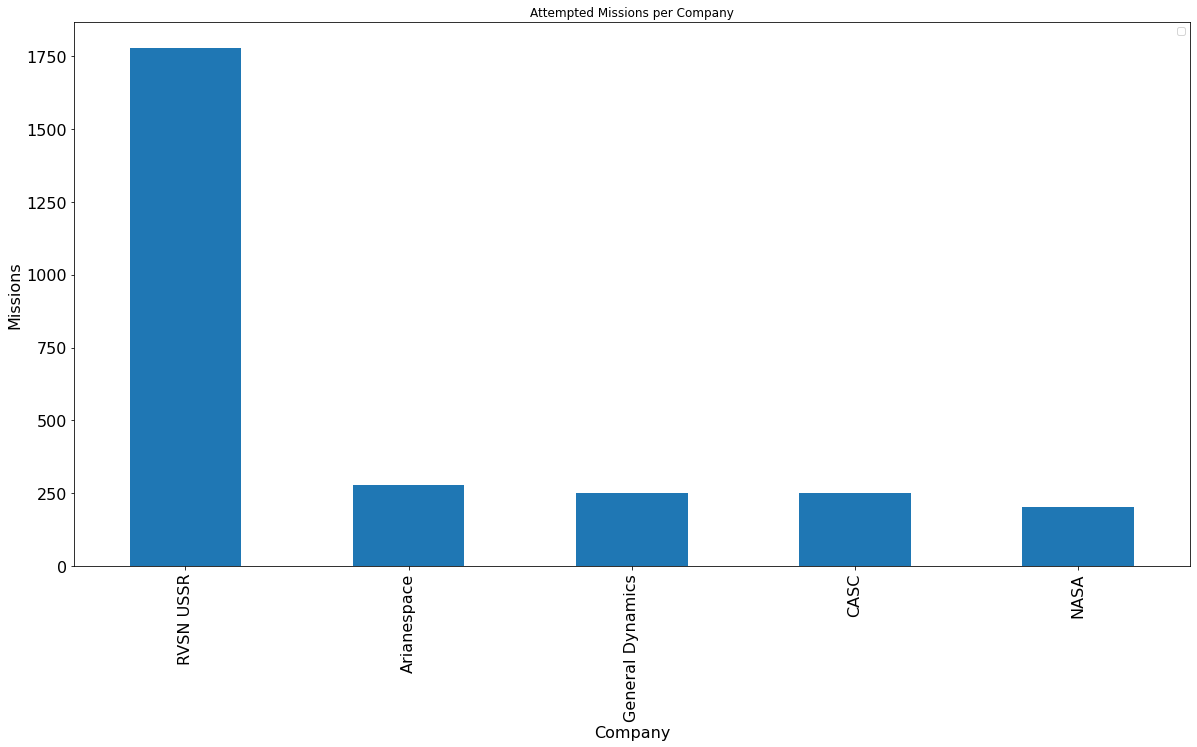

In [88]:
space_missions_df_companies.plot.bar(figsize=(20,10),fontsize=16);
plt.xlabel("Company",fontsize=16);
plt.ylabel("Missions",fontsize=16);
plt.legend("");
plt.title("Attempted Missions per Company");

### Countries from which the most space missions were launched from

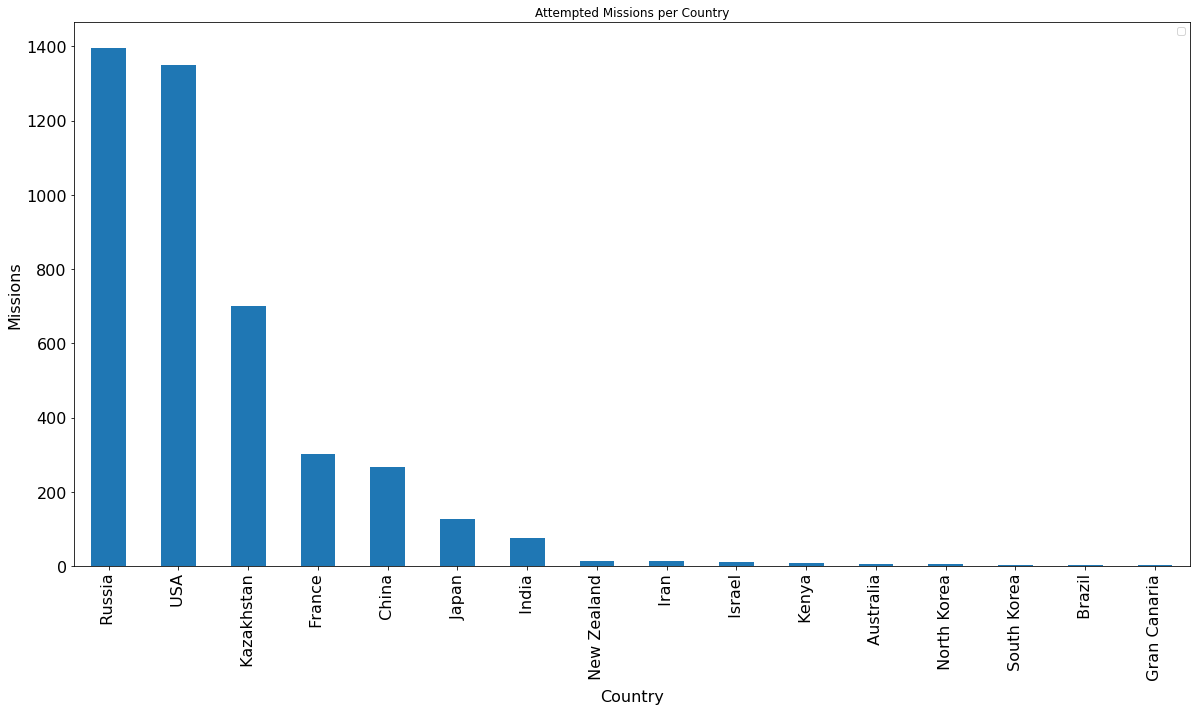

In [89]:
space_missions_df_country_corrected.plot.bar(figsize=(20,10),fontsize=16);
plt.xlabel("Country",fontsize=16);
plt.ylabel("Missions",fontsize=16);
plt.legend("");
plt.title("Attempted Missions per Country");

### Companies and their success rate

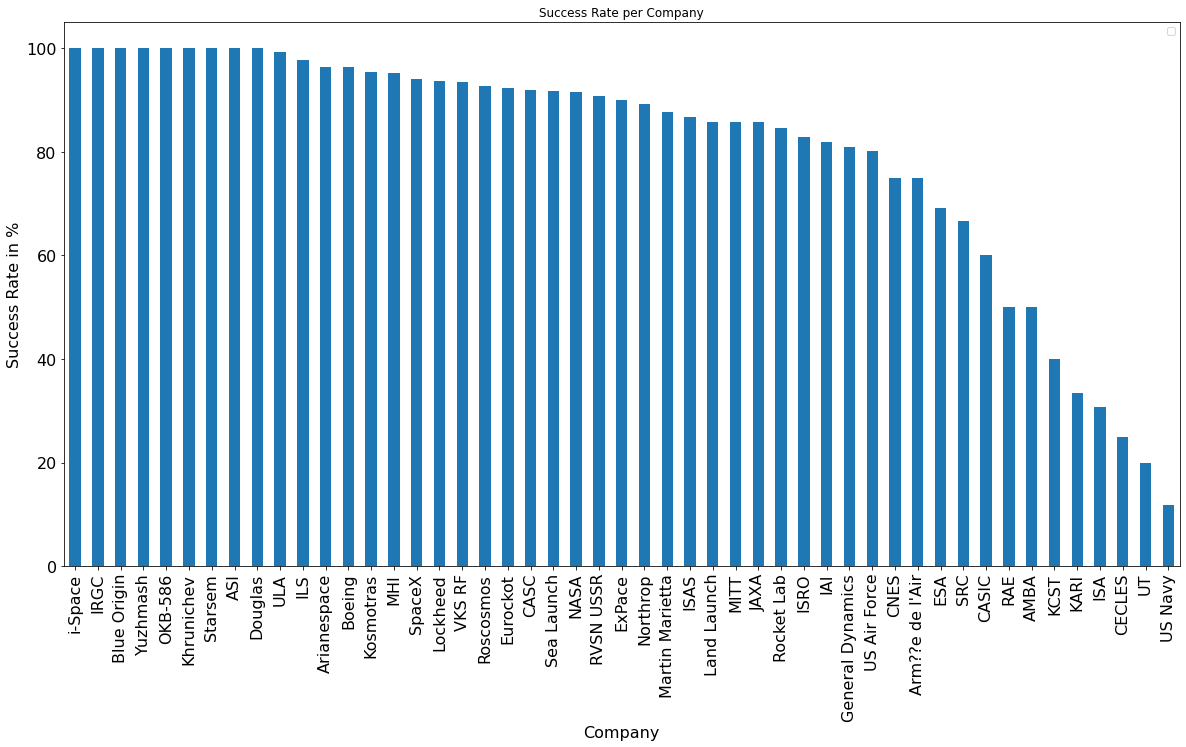

In [90]:
space_missions_df_success.Success_Rate.plot.bar(figsize=(20,10),fontsize=16);
plt.xlabel("Company",fontsize=16);
plt.ylabel("Success Rate in %",fontsize=16);
plt.legend("");
plt.title("Success Rate per Company");

## Conclusion

As I already was interested in spaceflight before I did my research on this dataset, I found it really interseting to use a dataset about my favorite topic for the course project. During my analysis I found out some quite intersetsing stuff. To me the most interesting part was the answer to Q2. All in all, I had a lot of fun during the analysis and I would recommend, doing your own research on this dataset. Below I have listed some points, which could potentially be researched next.

## Ideas for future analysis

- Comparing the success rates of different rockets
- Comparing the average costs for a mission, for different rockets
- Comparing the average costs for a mission, for different companies
- Merge with a data set about manned spaceflight and get data about the manned rate & other stuff
- Analyse the time intervals between launches (overall and per company)
- Comparing sum of mission cost for different rockets

## Used Resources

pandas documentation: https://pandas.pydata.org/docs/user_guide/index.html

matplotlib documentation: https://matplotlib.org/contents.html

In [92]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "gspacecofficial/cp-spaceflight-from-1957-to-2020" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/gspacecofficial/cp-spaceflight-from-1957-to-2020


'https://jovian.ml/gspacecofficial/cp-spaceflight-from-1957-to-2020'